<a id=top-page></a>
# `pykitPIV` demo: Generate synthetic images

<div class="alert alert-block alert-info" style="margin-top: 20px">
<font size="3"><strong>Table of contents:</strong></font>
<br>
<ol>
    <li><a href="#generate-particles">Generate particles</a></li>
    <li><a href="#generate-velocity-field">Generate random velocity field to advect the particles</a></li>
    <li><a href="#add-movement">Add movement to particles</a></li>
        <ul>
        <li><a href="#add-movement-update-time-sep">Update time separation</a></li>
        <li><a href="#add-movement-visualize">Visualize the PIV image pair</a></li>
        </ul>
    <li><a href="#save">Save the dataset</a></li>
    <li><a href="#upload">Upload the saved datasets</a></li>
</ol>
<p></p>
</div>
<br>

***

In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import cmcrameri.cm as cmc
from pykitPIV import Particle, FlowField, Motion, Image

In [3]:
n_images = 1

In [4]:
image_size = (10,10)

In [5]:
size_buffer = 0

In [6]:
figsize = (6,6)

<a id=generate-particles></a>
***

## Generate particles

[Go to the top](#top-page)

In [44]:
particles = Particle(n_images, 
                     size=image_size, 
                     size_buffer=size_buffer,
                     diameters=(2,4),
                     distances=(1,2),
                     densities=(0.02,0.05),
                     signal_to_noise=(5,20),
                     diameter_std=0.5,
                     seeding_mode='random', 
                     random_seed=3)

In [45]:
particles.particle_coordinates

[(array([8.92946954, 8.96293089, 1.2558531 ]),
  array([2.07242878, 0.51467203, 4.40809844]))]

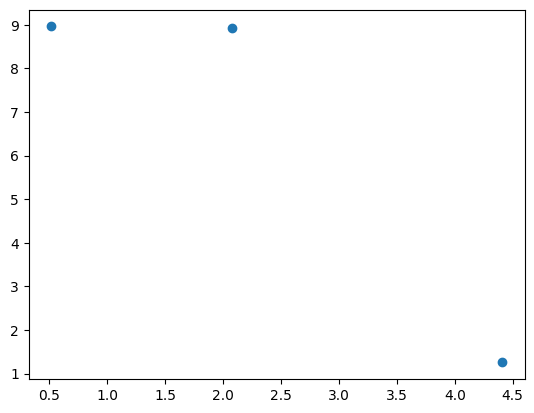

In [52]:
plt.scatter(particles.particle_coordinates[0][1], particles.particle_coordinates[0][0])

In [54]:
DD = particles.particle_positions[0,0,:,:]
np.flipud(DD)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [48]:
image = Image(random_seed=100)

In [49]:
image.add_particles(particles)

Particles added to the image.


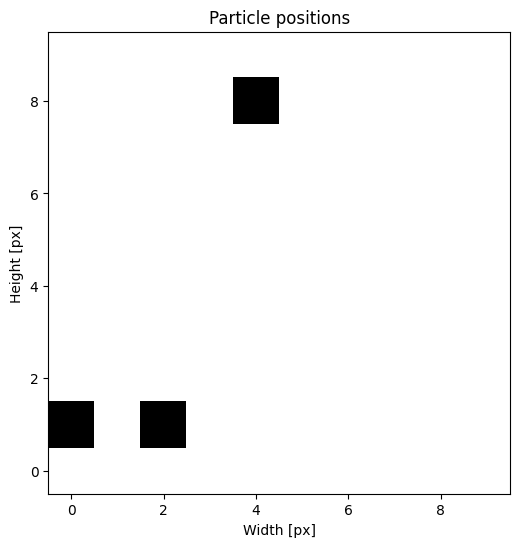

In [50]:
image.plot(0, 
           with_buffer=True,
           xlabel='Width [px]',
           ylabel='Height [px]',
           title='Particle positions',
           cmap='Greys',
           figsize=figsize, 
           filename='particle-positions.png');

In [40]:
image.add_reflected_light(exposures=(0.6,0.65),
                          maximum_intensity=2**16-1,
                          laser_beam_thickness=1,
                          laser_over_exposure=1,
                          laser_beam_shape=0.99,
                          alpha=1/20)

Reflected light added to images I1.


In [ ]:
image.plot(0, 
           with_buffer=True,
           xlabel='Width [px]',
           ylabel='Height [px]',
           title='Example PIV image',
           cmap='Greys_r',
           figsize=figsize, 
           filename='example-image.png');

<a id=generate-velocity-field></a>
***

## Generate random velocity field to advect the particles

[Go to the top](#top-page)

In [ ]:
flowfield = FlowField(n_images,
                      size=image_size,
                      size_buffer=size_buffer,
                      random_seed=100)

In [ ]:
flowfield.generate_random_velocity_field(gaussian_filters=(10,11),
                                         n_gaussian_filter_iter=2,
                                         displacement=(0,10))

In [ ]:
image.add_flowfield(flowfield)

In [ ]:
image.plot_velocity_field(0,
                          with_buffer=True,
                          xlabel='Width [px]',
                          ylabel='Height [px]',
                          title=('Example random velocity component $u$', 'Example random velocity component $v$'),
                          cmap=cmc.oslo_r,
                          figsize=figsize,
                          filename='example-random-velocity-field.png');

In [ ]:
image.plot_velocity_field_magnitude(0,
                                    with_buffer=True,
                                    xlabel='Width [px]',
                                    ylabel='Height [px]',
                                    title='Example random velocity field magnitude',
                                    cmap=cmc.oslo_r,
                                    figsize=figsize,
                                    filename='example-random-velocity-field-magnitude.png');

In [ ]:
image.plot_velocity_field_magnitude(0,
                                    with_buffer=False,
                                    add_quiver=True,
                                    quiver_step=10,
                                    quiver_color='r',
                                    xlabel='Width [px]',
                                    ylabel='Height [px]',
                                    title='Example random velocity field magnitude',
                                    cmap=cmc.oslo_r,
                                    figsize=figsize,
                                    filename='example-random-velocity-field-magnitude-quiver.png');

In [ ]:
image.plot_velocity_field_magnitude(0,
                                    with_buffer=False,
                                    add_streamplot=True,
                                    streamplot_density=1,
                                    streamplot_color='g',
                                    xlabel='Width [px]',
                                    ylabel='Height [px]',
                                    title='Example random velocity field magnitude',
                                    cmap=cmc.oslo_r,
                                    figsize=figsize,
                                    filename='example-random-velocity-field-magnitude-streamplot.png');

<a id=add-movement></a>
***

## Add movement to particles

[Go to the top](#top-page)

In [ ]:
motion = Motion(particles, 
                flowfield, 
                time_separation=0.1)

In [ ]:
motion.runge_kutta_4th(n_steps=10)

In [ ]:
particles.particle_coordinates

In [ ]:
motion.particle_coordinates_I1

In [ ]:
motion.plot_particle_motion(0,
                            s=60,
                            color_I1='k',
                            color_I2='r',
                            xlabel='Width [px]',
                            ylabel='Height [px]',
                            title='Displacement of particles',
                            figsize=figsize,
                            filename='particle-displacement-1.png');

<a id=add-movement-visualize></a>

#### Visualize the PIV image pair:

[Go to the top](#top-page)

In [ ]:
image.add_motion(motion)

In [ ]:
image.add_reflected_light(exposures=(0.6,0.65),
                          maximum_intensity=2**16-1,
                          laser_beam_thickness=1,
                          laser_over_exposure=1,
                          laser_beam_shape=0.99,
                          alpha=1/3)

In [ ]:
image.plot(0, 
           instance=1,
           with_buffer=True,
           xlabel='Width [px]',
           ylabel='Height [px]',
           title='Example PIV image $I_1$',
           cmap='Greys_r',
           figsize=figsize, 
           filename='example-image-I1-with-buffer.png');

In [ ]:
image.plot(0, 
           instance=2,
           with_buffer=True,
           xlabel='Width [px]',
           ylabel='Height [px]',
           title='Example PIV image $I_2$',
           cmap='Greys_r',
           figsize=figsize, 
           filename='example-image-I2-with-buffer.png');

In [ ]:
image.images_I1.shape

<a id=save></a>
***

## Save the dataset

[Go to the top](#top-page)

Note, that at the last stage of the PIV image generation we may want to remove buffers from the image by running the `Image.remove_buffers()` function:

In [ ]:
image.remove_buffers()

In [ ]:
images_tensor = image.image_pairs_to_tensor()

In [ ]:
images_tensor.shape

In [ ]:
targets_tensor = image.targets_to_tensor()

In [ ]:
tensors_dictionary = {"I"      : images_tensor, 
                      "targets": targets_tensor}

In [ ]:
image.save_to_h5(tensors_dictionary, 
                 filename='pykitPIV-tutorial-PIV-pairs.h5')

<a id=upload></a>
***

## Upload the saved dataset

[Go to the top](#top-page)

The standalone import of previously saved PIV image pairs and the associated targets can be performed following this minimal example:

In [ ]:
from pykitPIV import Image

In [ ]:
image = Image()

In [ ]:
tensors_dictionary_uploaded = image.upload_from_h5(filename='pykitPIV-tutorial-PIV-pairs.h5')

***